In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'AppleGothic'

features = ['CLN_AGE_R', 'VLM', 'USEC', 'GB2']
df_filtered = df[features].copy()

df_filtered = df_filtered.dropna()

scaler = StandardScaler()
df_filtered[['CLN_AGE_R', 'VLM', 'USEC']] = scaler.fit_transform(df_filtered[['CLN_AGE_R', 'VLM', 'USEC']])
df_filtered.drop(df_filtered[df_filtered['GB2'].isin(['숙박', '종합쇼핑', '외식', '인터넷게임', '교통', '레저스포츠', '목욕', '스키', '스포츠용품구매', '애완동물돌보기', '유흥','자전거', '미용', '골프', '패션쇼핑', '운동경기관람', '종교활동', '헬스'])].index, inplace=True)
df_filtered.dropna(inplace=True)

encoder = OneHotEncoder(sparse=False)
gb2_encoded = encoder.fit_transform(df_filtered[['GB2']])
gb2_columns = encoder.get_feature_names_out(['GB2'])
gb2_encoded_df = pd.DataFrame(gb2_encoded, columns=gb2_columns)
gb2_encoded_df.index = df_filtered.index

X = pd.concat([df_filtered[['CLN_AGE_R', 'VLM', 'USEC']], gb2_encoded_df], axis=1)

In [ ]:
n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_filtered['cluster'] = kmeans.fit_predict(X)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_[:, :3])
centers_df = pd.DataFrame(cluster_centers, columns=['CLN_AGE_R', 'VLM', 'USEC'])
print("클러스터 중심값 (연속형 변수):")
print(centers_df)

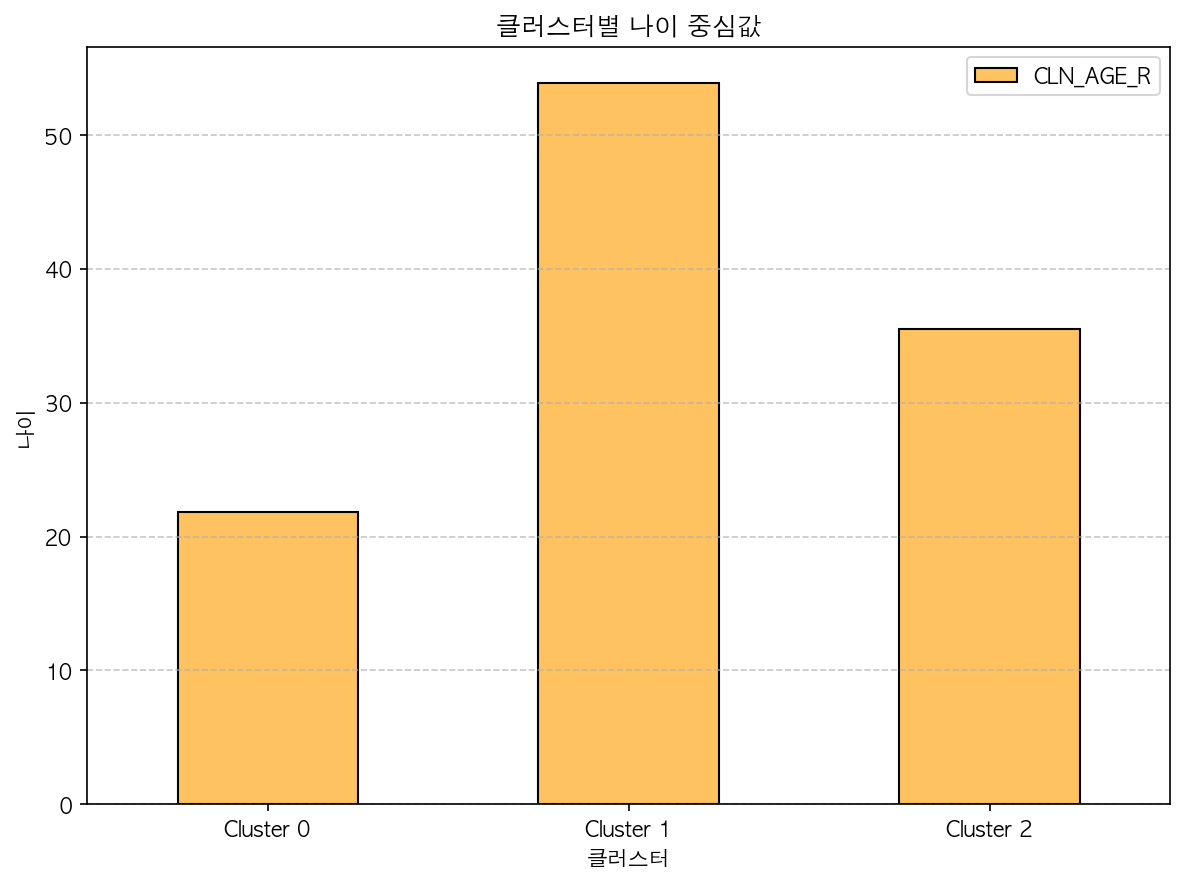

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150 

age_centers = centers_df[['CLN_AGE_R']]

age_centers.plot(kind='bar', figsize=(8, 6), color='#FFC260', edgecolor='k')
plt.title("클러스터별 나이 중심값")
plt.xlabel("클러스터")
plt.ylabel("나이")
plt.xticks(ticks=range(len(age_centers)), labels=[f'Cluster {i}' for i in age_centers.index], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

클러스터별 GB2 관심사 비율:
GB2          공연관람      관광쇼핑      교육훈련        독서    미술공예참여      사진촬영      악기연주  \
cluster                                                                         
0        0.184603  0.048386  0.065819  0.111560  0.038065  0.442095  0.007357   
1        0.203042  0.092358  0.129402  0.136600  0.068604  0.151913  0.016213   
2        0.226857  0.094244  0.147447  0.150196  0.066297  0.084577  0.012987   

GB2           여행사      음악감상        체험  
cluster                                
0        0.011327  0.013915  0.076874  
1        0.028453  0.019285  0.154129  
2        0.023559  0.018695  0.175140  


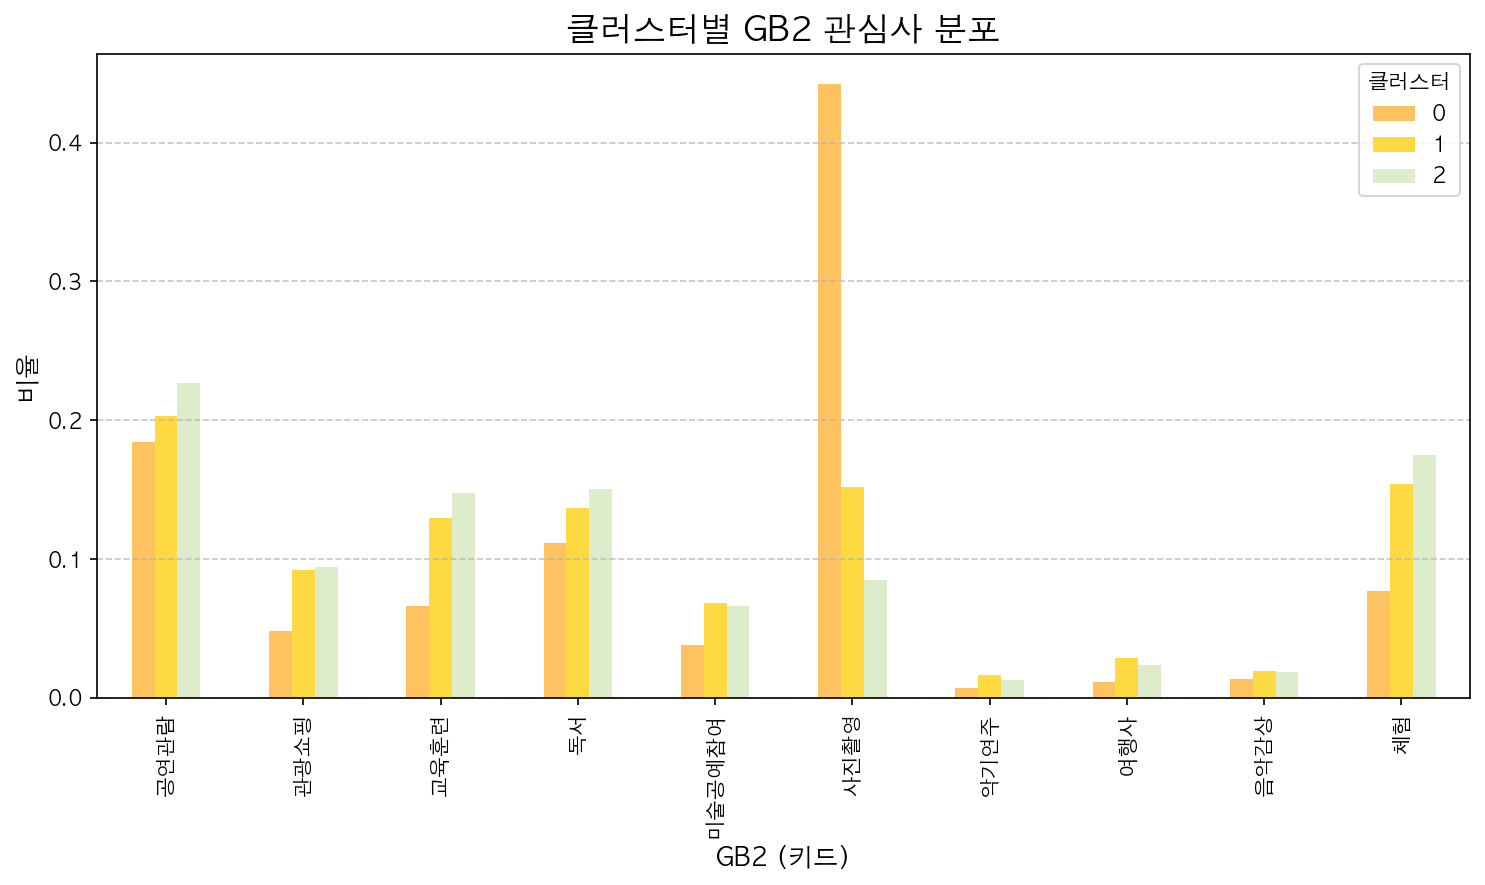

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150

gb2_cluster_analysis = df_filtered.groupby('cluster')['GB2'].value_counts(normalize=True).unstack()
print("클러스터별 GB2 관심사 비율:")
print(gb2_cluster_analysis)

color_palette = ['#FFC260', '#FFD942', '#DDECCA']
ax = gb2_cluster_analysis.T.plot(kind='bar', figsize=(10, 6), color=color_palette)

plt.title("클러스터별 GB2 관심사 분포", fontsize=16)
plt.xlabel("GB2 (키드)", fontsize=12)
plt.ylabel("비율", fontsize=12)
plt.legend(title="클러스터", loc="upper right", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()